# Lecture 1

In [3]:
import numpy as np
data = np.loadtxt('./09_data.txt')

data[0:9]
print("mean", np.mean(data, axis=0))

mean [1.56535948 1.26470588]


In [4]:
print("variance", np.var(data, axis=0))

variance [1.85357128 1.27306805]


In [5]:
print("standard deviation:", np.std(data, axis=0))

standard deviation: [1.36145925 1.12830317]


### Covariance

In [6]:
print(np.cov(data, rowvar=False))

[[ 1.85964856 -0.1927676 ]
 [-0.1927676   1.27724204]]


In [7]:
print(np.corrcoef(data, rowvar=False))

[[ 1.         -0.12507831]
 [-0.12507831  1.        ]]


###  Error propagation

In [8]:
A = np.array([[1, 1]])
V = np.cov(data, rowvar=False)

print(V[0,0] + V[1,1])

U = A@V@A.T



print(U)

print(np.var(data[:,0] + data[:,1]))


print(np.var(data[:,0] - data[:,1]))


3.136890603235832
[[2.75135541]]
2.7423640480157205
3.510914605493613


### Transformation

0.22733602246716966
[0.31675834 0.79736546 0.67625467 ... 0.7802251  0.2300369  0.88856197]


''

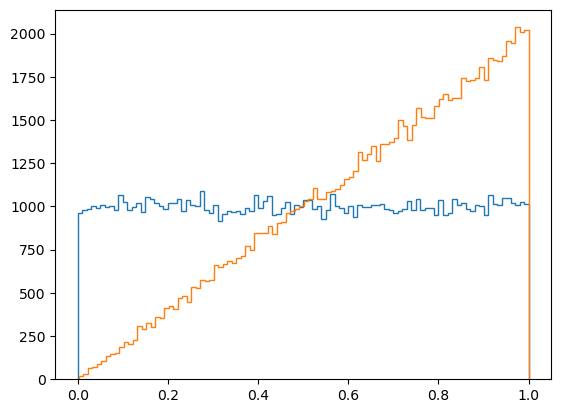

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

rfloat = rng.random()
print(rfloat)
u = rng.random(100000)
print(u)
plt.hist(u,bins=100, histtype='step')
plt.hist(np.sqrt(u), bins=100, histtype='step')
;

### error propagation

24.0 23.998205972260962 4.0 4.004524842174767


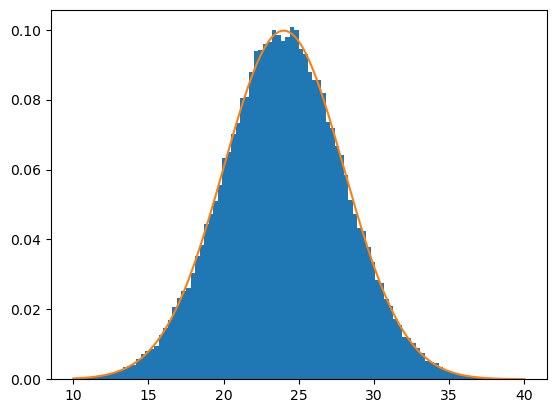

In [16]:
import scipy
sI = 0.1
mI = 0.6
Is = scipy.stats.norm.rvs(mI,sI,100000)
R = 40
Us = R*Is
U_axis = np.linspace(10,40,1000)
plt.hist(Us,bins=100,density=True,range=(10,40))
#plt.plot(U_axis, p(R_axis,mu_I=mI, sigma_I=sI))
plt.plot(U_axis, scipy.stats.norm.pdf(U_axis,R*mI,R*sI),"-")
print(R*mI, np.mean(Us), R*sI, np.std(Us))

40.0 41.243347315986625 6.666666666666668 7.621576470802321


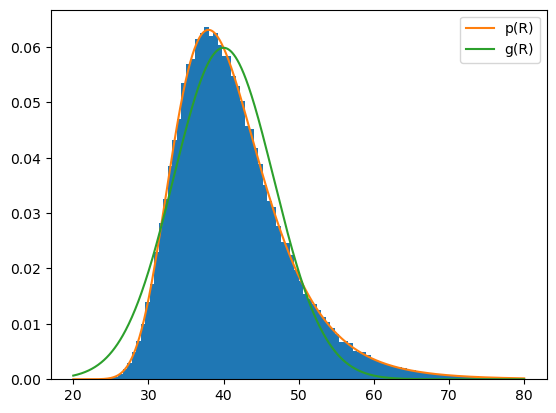

In [30]:
def p(R, U = 24, mu_I = 0.6, sigma_I = 0.1):
    # p(R) = U/R^2 g(I(R)) = \frac{U}{R^2 \sqrt{2\pi}\sigma_I}e^{-\frac{(U/R-\mu_I)^2}{2\sigma_I^2}}
    return U/R**2/np.sqrt(2 * np.pi)/sigma_I * np.exp(-(U/R-mu_I)**2/(2*(sigma_I)**2))

sI = 0.1
mI = 0.6
Is = scipy.stats.norm.rvs(mI,sI,100000)
U = 24
Rs = U/Is
R_axis = np.linspace(20,80,1000)
plt.hist(Rs,bins=100,density=True,range=(20,80))
plt.plot(R_axis, p(R_axis,mu_I=mI, sigma_I=sI), label="p(R)")
plt.plot(R_axis, scipy.stats.norm.pdf(R_axis,U/mI,U/mI**2*sI),"-", label="g(R)")
plt.legend()
print(U/mI, np.mean(Rs), U/mI/mI*sI, np.std(Rs))

# Lecture 2

In [31]:
import scipy
import numpy as np

pseudo_a = scipy.stats.norm.rvs(1, 0.5, 10000) 
print(pseudo_a) 
is_outside = abs(pseudo_a - 1) > 0.5 
print(is_outside) 
print("fraction outside one sigma:", sum(is_outside)/len(pseudo_a))


[ 1.31372436  0.10755683  1.77253609 ...  1.65475733  1.65132281
 -0.12217512]
[False  True  True ...  True  True  True]
fraction outside one sigma: 0.3147


(array([24., 45., 66., 67., 58., 25., 18.,  1.,  2.,  0.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]), <BarContainer object of 10 artists>)


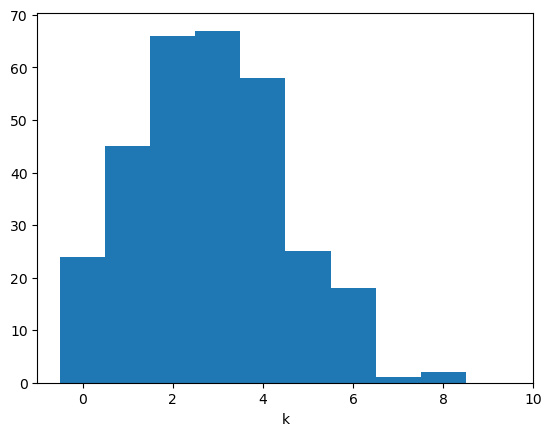

In [33]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("09_data.txt")
summe = data[:,0] + data[:,1]
freq = plt.hist(summe, bins=10, range=(-0.5,9.5))
plt.xlabel("k")
print(freq)

In [34]:
scipy.integrate.quad(lambda x: scipy.stats.poisson.pmf(18,x), 18-np.sqrt(18), 18+np.sqrt(18))

(0.6781977937903096, 7.529508059159858e-15)

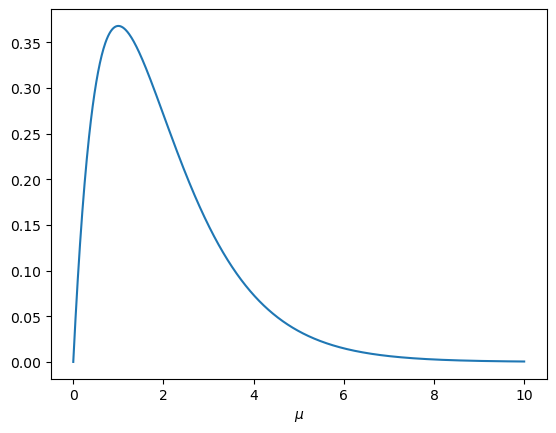

In [35]:
mus = np.linspace(0,10,1000)
plt.plot(mus, scipy.stats.poisson.pmf(1,mus))
plt.xlabel(r"$\mu$");

In [36]:
scipy.integrate.quad(lambda x: scipy.stats.poisson.pmf(1,x), 1-np.sqrt(1), 1+np.sqrt(1))

(0.593994150290162, 6.594659821447934e-15)

#### Better interval

2.359784379558492

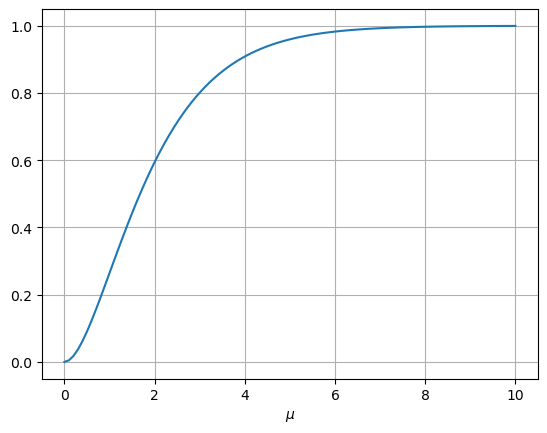

In [37]:
def intervall(mu_plus):
    return scipy.integrate.quad(lambda x: scipy.stats.poisson.pmf(1,x), 0, mu_plus)[0]

mus = np.linspace(0,10,100)
plt.plot(mus, np.vectorize(intervall)(mus))
plt.grid()
plt.xlabel(r"$\mu$")

scipy.optimize.brentq(lambda x: intervall(x)-0.6827, 0,10)

### Wilk's theorem

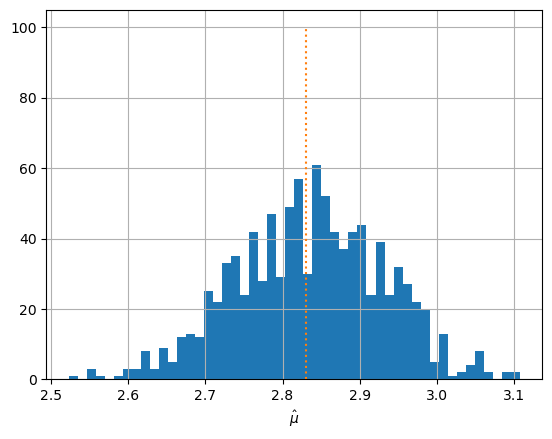

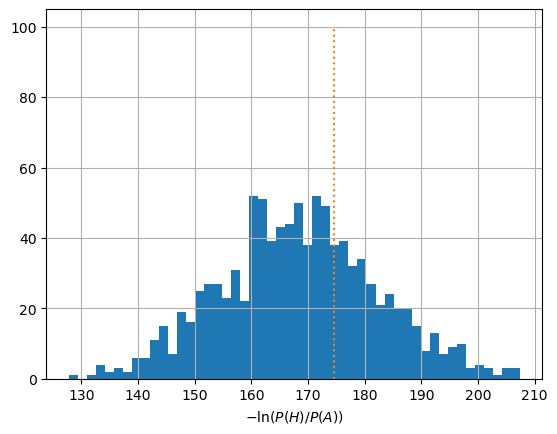

In [45]:
#simuliere 1000 Spielzeiten
muobs = np.mean(summe)
tore = scipy.stats.poisson.rvs(muobs,size=(1000,306))
d = np.zeros(len(tore))
mu = np.zeros(len(tore))
for i in range(len(tore)):
    mu[i] = np.mean(tore[i,:])
    d[i] = np.sum(-scipy.stats.poisson.logpmf(tore[i],mu[i]) + scipy.stats.poisson.logpmf(tore[i],tore[i]))
    
plt.hist(mu, bins=50)
muobs = np.mean(summe)
plt.plot([muobs, muobs], [0, 100], linestyle = 'dotted')
plt.grid()
plt.xlabel("$\hat \mu$");
plt.show()
dobs = -np.sum(scipy.stats.poisson.logpmf(summe,muobs)) + np.sum(scipy.stats.poisson.logpmf(summe,summe))
plt.hist(d, bins=50)
plt.plot([dobs, dobs], [0, 100], linestyle = 'dotted')

plt.grid()
plt.xlabel("$-\ln(P(H)/P(A))$")
plt.show()

p-Wert via Chi2: 0.04111257571008784


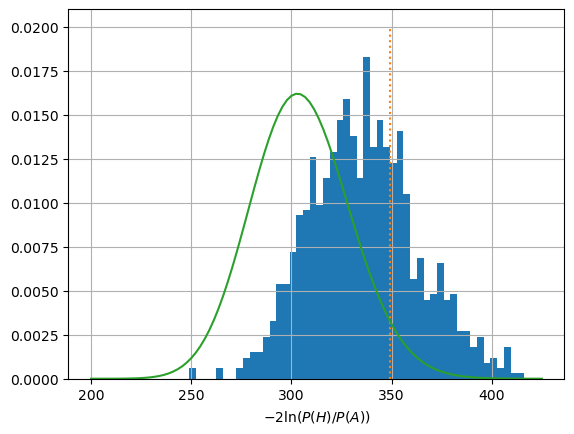

In [42]:

plt.hist(2*d, bins=50, density=True)
plt.plot([2*dobs, 2*dobs], [0, 0.02], linestyle = 'dotted')
ds = np.linspace(200, 425, 100)
plt.plot(ds,scipy.stats.chi2.pdf(ds, 305))



print("p-Wert via Chi2:", scipy.stats.chi2.sf(2*dobs, 305))

plt.grid()
plt.xlabel("$-2\ln(P(H)/P(A))$")
plt.show()

### Handball

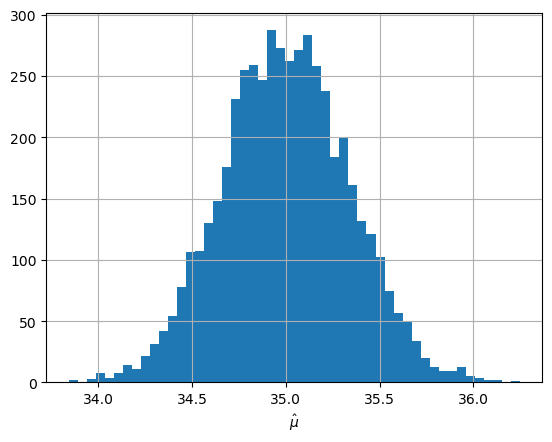

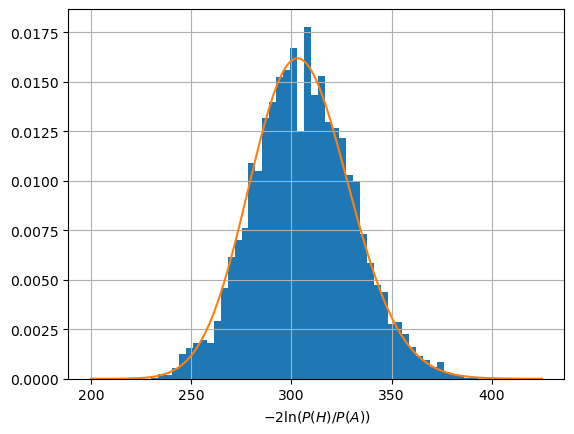

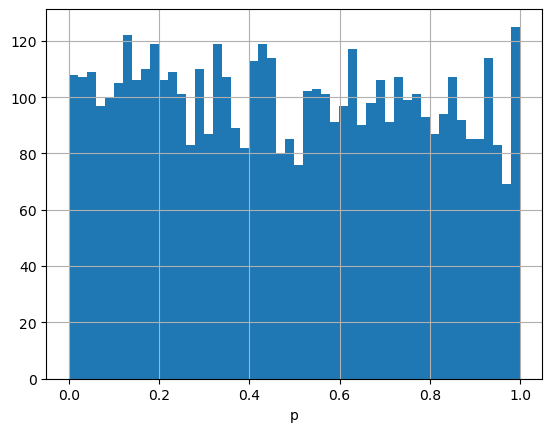

In [43]:
#simuliere 5000 Spielzeiten
muobs = 35

tore = scipy.stats.poisson.rvs(muobs,size=(5000,306))

d = np.zeros(len(tore))
mu = np.zeros(len(tore))
for i in range(len(tore)):
    mu[i] = np.mean(tore[i,:])
    d[i] = np.sum(-scipy.stats.poisson.logpmf(tore[i],mu[i]) + scipy.stats.poisson.logpmf(tore[i],tore[i]))
    
plt.hist(mu, bins=50)
plt.grid()
plt.xlabel("$\hat \mu$")
plt.show()

plt.hist(2 * d, bins=50, density=True)
ds = np.linspace(200, 425, 100)
plt.plot(ds,scipy.stats.chi2.pdf(ds, 305))
plt.grid()
plt.xlabel("$-2\ln(P(H)/P(A))$")
plt.show()

plt.hist( scipy.stats.chi2.sf(2*d, 305), bins=50)
plt.grid()
plt.xlabel("p")
plt.show()

# Lecture 3

0.000432711737554162 0.004531178682458194


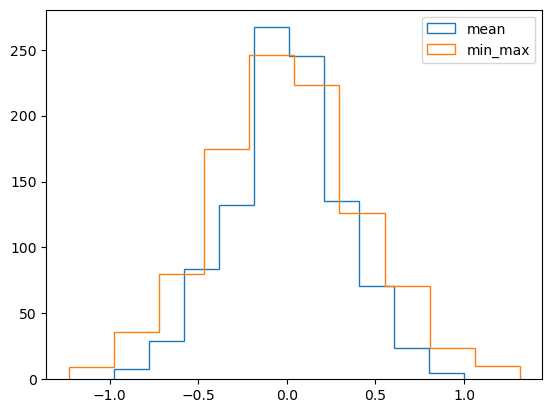

In [67]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

xs = scipy.stats.norm.rvs(1,1,size=(1000,10))
ys = scipy.stats.uniform.rvs(0,2,size=(1000,10))

#xs = ys
mu1 = np.mean(xs, axis=1)
mu2 = (np.max(xs, axis=1) + np.min(xs, axis=1))/2
plt.hist(mu1-1, histtype="step", label="mean")
plt.hist(mu2-1, histtype="step", label="min_max")
plt.legend()
print(np.mean(mu1-1), np.mean(mu2-1))

-0.09993926417503385 -0.032052568755410106


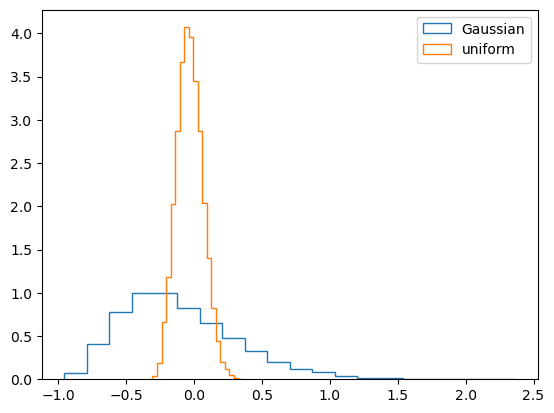

In [69]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

n_sample = 10
xs = scipy.stats.norm.rvs(1,1,size=(10000,n_sample))
ys = scipy.stats.uniform.rvs(0, 2,size=(10000,n_sample))

true_var1 = 1
true_var2 = 2**2/12

var1 = np.var(xs, axis=1)
var2 = np.var(ys, axis=1)
plt.hist(var1 - true_var1, histtype="step", density=True, bins=20, label="Gaussian")
plt.hist(var2 - true_var2, histtype="step", density=True, bins=20, label="uniform")
plt.legend()
print(np.mean(var1 - true_var1), np.mean(var2 - true_var2))